Corrélations avec la variable 'Response' :
Response               1.000000
TotalAcceptedCmp       0.427124
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
AcceptedCmp3           0.254005
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
AcceptedCmp4           0.180205
AcceptedCmp2           0.169294
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income                 0.133047
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
Education              0.090806
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
Complain              -0.002029
NumWebVisitsMonth     -0.002209
Marital_Status        -0.012641
Kidhome               -0.077909
Teenhome              -0.153901
Recency               -0.199766
Name: Response, dtype: float64


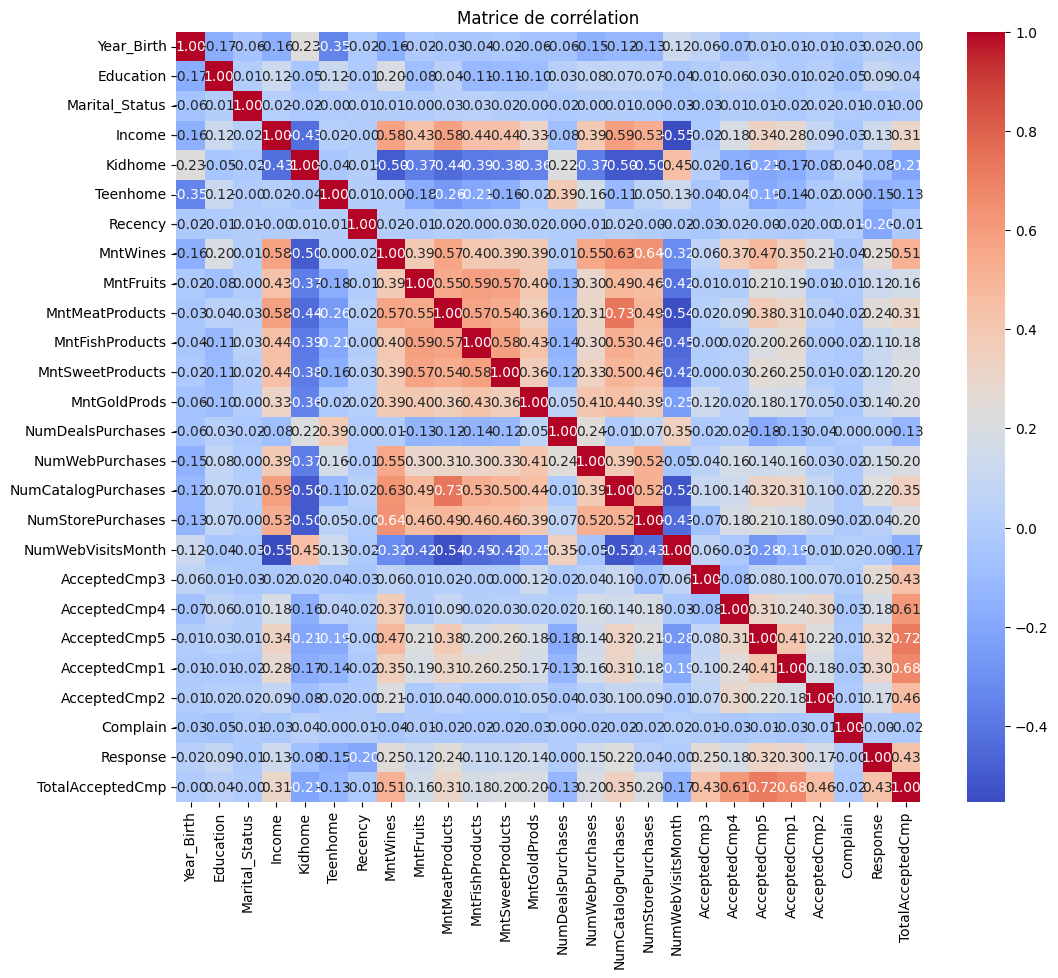

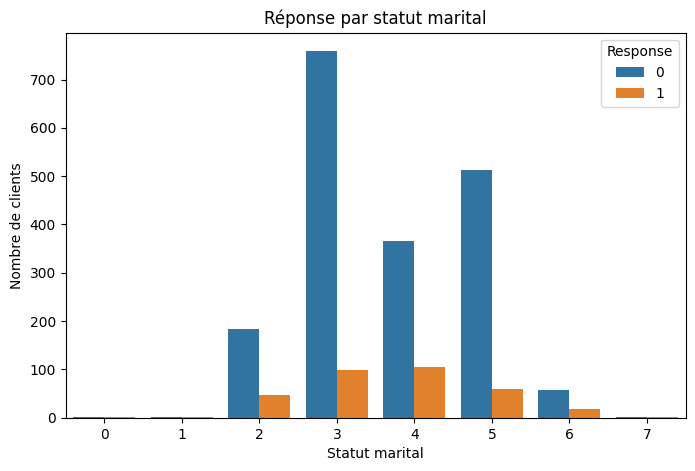

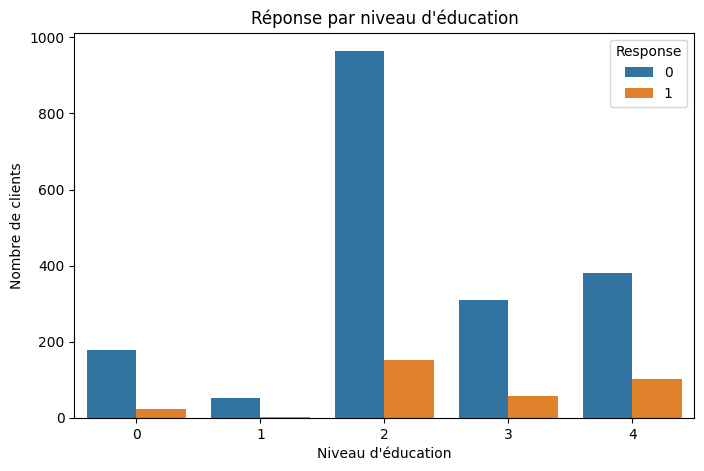

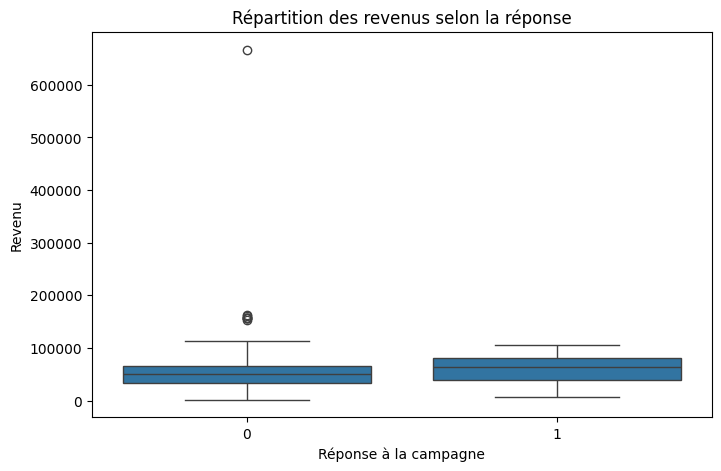

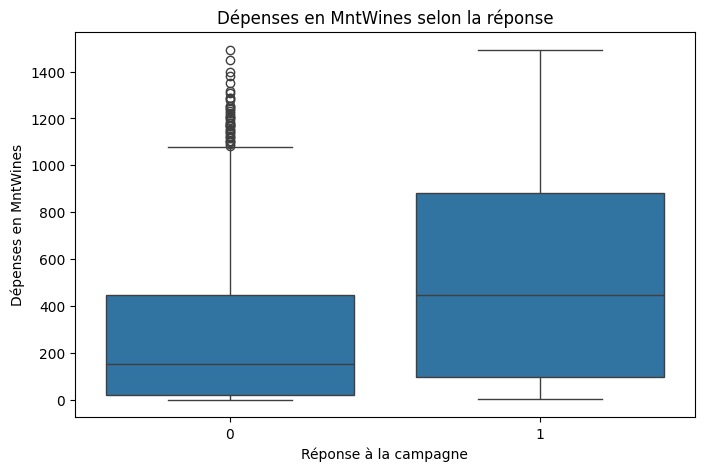

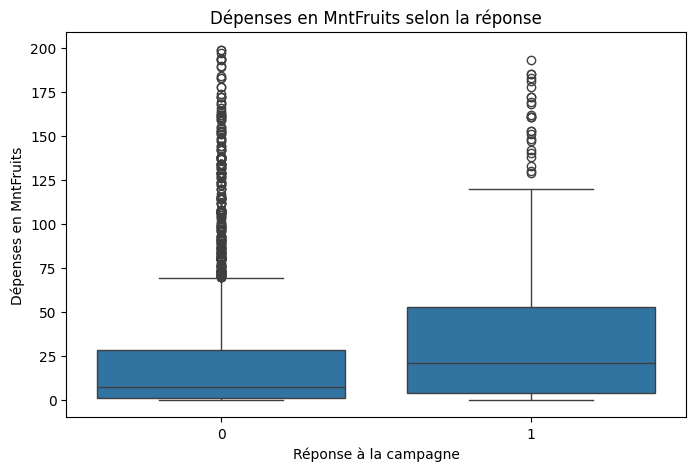

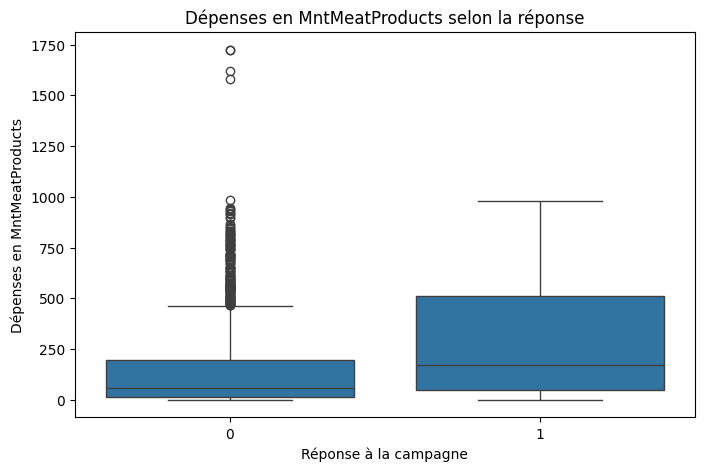

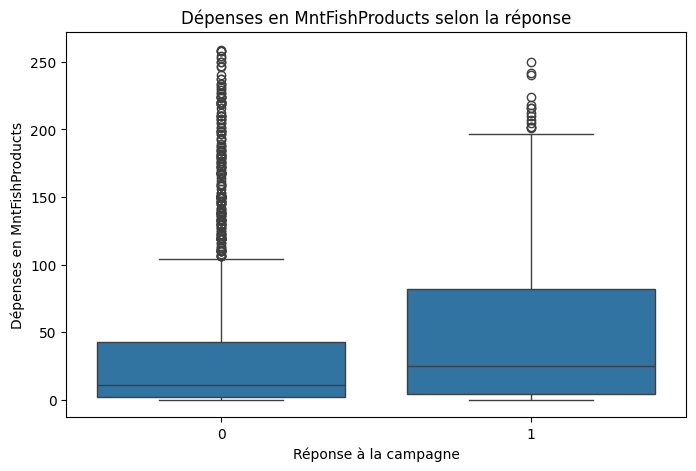

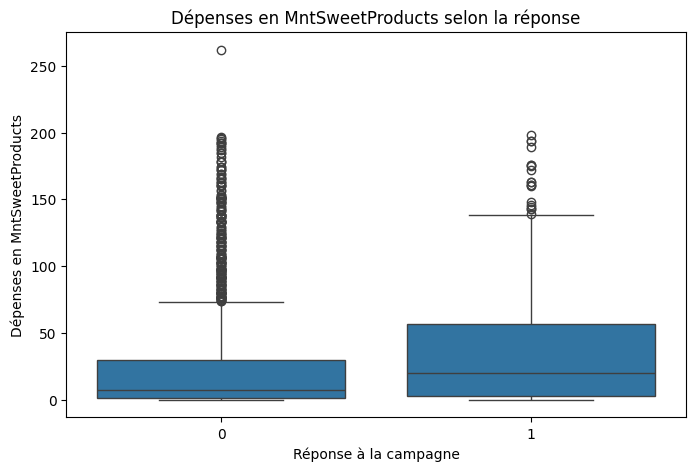

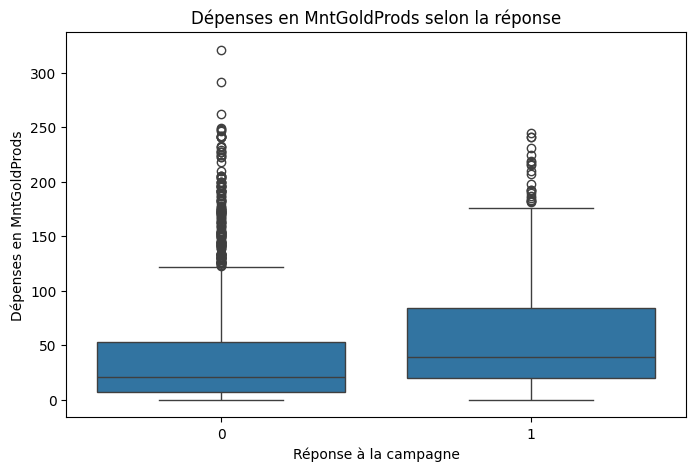

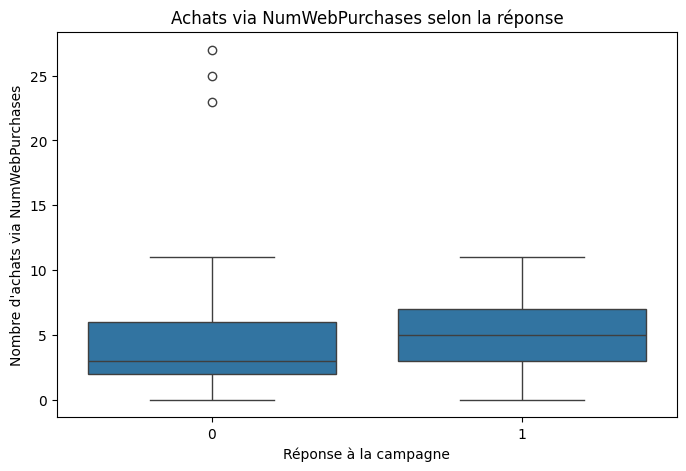

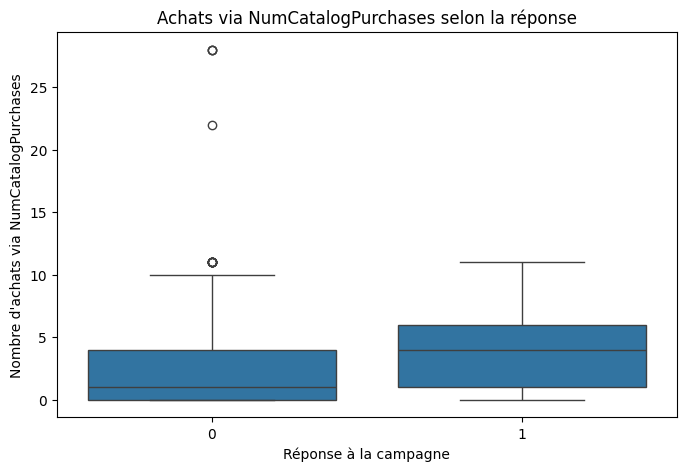

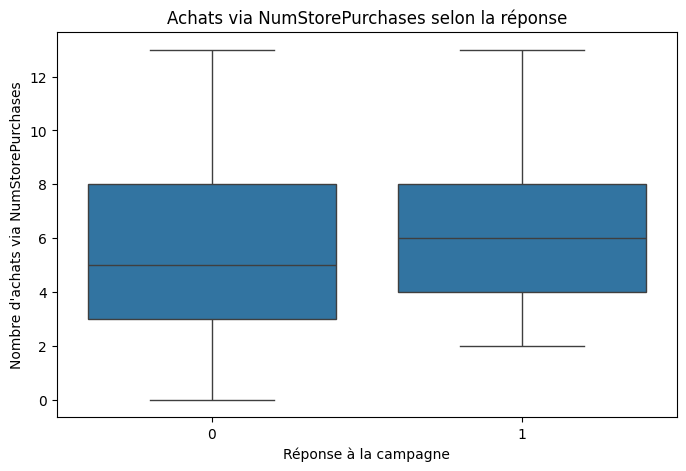

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Charger les données
df = pd.read_csv("Camp_Market_nettoye.csv", sep=';')

# Nettoyage : supprimer les colonnes inutiles et gérer les valeurs manquantes
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.dropna(inplace=True)

# Encodage des variables catégorielles
label_cols = ['Education', 'Marital_Status']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Création d'une nouvelle variable : TotalAcceptedCmp
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Corrélation avec la variable cible 'Response'
correlation_matrix = df.corr()
response_corr = correlation_matrix['Response'].sort_values(ascending=False)

# Affichage des corrélations les plus fortes avec 'Response'
print("Corrélations avec la variable 'Response' :")
print(response_corr)

# Visualisation : matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Visualisation : Réponse par statut marital
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', hue='Response', data=df)
plt.title("Réponse par statut marital")
plt.xlabel("Statut marital")
plt.ylabel("Nombre de clients")
plt.show()

# Visualisation : Réponse par niveau d'éducation
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', hue='Response', data=df)
plt.title("Réponse par niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de clients")
plt.show()

# Visualisation : Répartition des revenus selon la réponse
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Répartition des revenus selon la réponse")
plt.xlabel("Réponse à la campagne")
plt.ylabel("Revenu")
plt.show()

# Comparaison des dépenses par type de produit selon la réponse
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in product_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Response', y=col, data=df)
    plt.title(f"Dépenses en {col} selon la réponse")
    plt.xlabel("Réponse à la campagne")
    plt.ylabel(f"Dépenses en {col}")
    plt.show()

# Comparaison des achats par canal selon la réponse
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for col in purchase_channels:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Response', y=col, data=df)
    plt.title(f"Achats via {col} selon la réponse")
    plt.xlabel("Réponse à la campagne")
    plt.ylabel(f"Nombre d'achats via {col}")
    plt.show()